# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

In [0]:
# Project Overview
# -----------------
#  Reading and Exploring Data
#  Data Preprocessing
#  Word Embeddings
#  Model Building 
#       i)  Fully connected Neural Network 
#                [Using 300d Glove Embeddings, 200d Glove Embeddings, 100d Glove Embeddings, 50d Glove Embeddings]
#       ii) Sequential LSTM   
#                [Using 300d Glove Embeddings, 200d Glove Embeddings, 100d Glove Embeddings, 50d Glove Embeddings]
#       iii) Bidirectional LSTM 
#                [Using 300d Glove Embeddings, 200d Glove Embeddings, 100d Glove Embeddings, 50d Glove Embeddings]
#  Comparative Report on Accuracy


## Get Required Files from Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/Sarcasam Detection/Data/"

### Reading and Exploring Data

### Reading Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. 

In [83]:
import pandas as pd
dataframe=pd.read_json(path_or_buf=project_path+'Sarcasm_Headlines_Dataset.json', lines='True')
dataframe.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Droping `article_link` from dataset.
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [84]:
dataframe.drop(columns=['article_link'], inplace=True)
dataframe.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Data Preprocessing 


*   Converting all into lower cases
*   Removal of symbols and punctuations.




In [86]:
import re
dataframe['headline']=dataframe['headline'].apply(lambda x:x.lower())
dataframe['headline']=dataframe['headline'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))
dataframe.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear sons web series closest t...,1
3,boehner just wants wife to listen not come up ...,1
4,jk rowling wishes snape happy birthday in the ...,0


## Getting the Length of each line and find the maximum length.
As different lines are of different length. We need to pad the our sequences using the max length.

In [87]:
x=dataframe['headline']
len(x) # The given dataset contains 26709 

26709

In [0]:
temp=[]
for i in range(len(x)):
  temp.append(len(x[i]))
# print('The length of each sequence is ', temp)

In [89]:
print('Maximum length statement is :', max(temp))    #Finding the maximum length

Maximum length statement is : 237


In [90]:
print('Minimum length statement is :', min(temp))    # Finding the minimum length

Minimum length statement is : 5


# Explore the data and get some insights about the data.

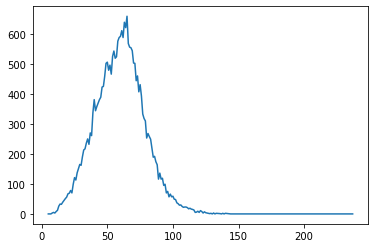

In [91]:
temp1 = dict( (l, temp.count(l) ) for l in set(temp))

import matplotlib.pyplot as plt
import numpy as np
plt.plot(list(temp1.keys()), list(temp1.values()))
plt.show()    # Plotting to understand more about the dataset
# Most of the given statement ranges beween the length 45 to 75

0    14985
1    11724
Name: is_sarcastic, dtype: int64

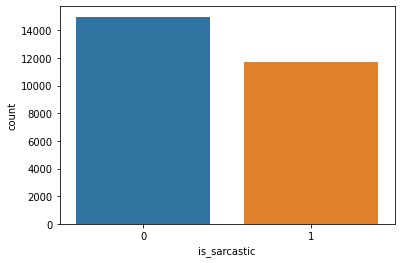

In [92]:
import seaborn as sns
sns.countplot(dataframe['is_sarcastic'])
dataframe['is_sarcastic'].value_counts()

 ### **Insights about the given Data **

1. Number of statements given in the dataset - 26709.
2. Sarcastic Statement                       - 11624
3. Non Sarcastic Statement                   - 14985
4. Maximum length of statement is            -   237
5. Minimum length of statement is            -     5
6. Most of the given statement ranges beween the length 45 to 75




#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import TimeDistributed

# Set Different Parameters for the model.

In [0]:
max_features = 10000
maxlen = max(temp)                # 237
embedding_size_300d = 300         #[for 300 dimensional glove embeddings]
embedding_size_200d = 200         #[for 200 dimensional glove embeddings]
embedding_size_100d = 100         #[for 100 dimensional glove embeddings]
embedding_size_50d = 50           #[for 50 dimensional glove embeddings]   

## Apply Keras Tokenizer of headline column of your data.
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer=Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(dataframe['headline'].values)

# Define X and y for your model.

In [96]:
X = tokenizer.texts_to_sequences(dataframe['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(dataframe['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [97]:
X.shape

(26709, 237)

In [98]:
y.shape

(26709,)

## Get the Vocabulary size 
Hint : You can use tokenizer.word_index.

In [0]:
vocabulary = tokenizer.word_index
vocabulary_size = len(tokenizer.word_index)+1  # +1 is used, since tokenizer.word_index assigns '0' for oov_token

In [100]:
list(vocabulary.items())[:10]

[('to', 1),
 ('of', 2),
 ('the', 3),
 ('in', 4),
 ('for', 5),
 ('a', 6),
 ('on', 7),
 ('and', 8),
 ('with', 9),
 ('is', 10)]

In [101]:
len (vocabulary)

28399

In [0]:
# vocabulary had 28399 words 

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

Glove Embedding with 300 Dimensions

In [105]:
EMBEDDING_FILE_300d = './glove.6B.300d.txt'
embeddings_300d = {}
for o in open(EMBEDDING_FILE_300d):
    word_300d = o.split(" ")[0]
    # print(word_300d)
    embd_300d = o.split(" ")[1:]
    embd_300d = np.asarray(embd_300d, dtype='float32')
    # print(embd_300d)
    embeddings_300d[word_300d] = embd_300d
print('Total no. of words in the  Glove Embedding :', len(embeddings_300d))
print('Length of each Embeddings :', len(embd_300d))

Total no. of words in the  Glove Embedding : 400000
Length of each Embeddings : 300


Glove Embedding with 200 Dimensions

In [106]:
EMBEDDING_FILE_200d = './glove.6B.200d.txt'
embeddings_200d = {}
for o in open(EMBEDDING_FILE_200d):
    word_200d = o.split(" ")[0]
    # print(word_200d)
    embd_200d = o.split(" ")[1:]
    embd_200d = np.asarray(embd_200d, dtype='float32')
    # print(embd_200d)
    embeddings_200d[word_200d] = embd_200d
print('Total no. of words in the  Glove Embedding :', len(embeddings_200d))
print('Length of each Embeddings :', len(embd_200d))

Total no. of words in the  Glove Embedding : 400000
Length of each Embeddings : 200


Glove Embedding with 100 Dimensions

In [107]:
EMBEDDING_FILE_100d = './glove.6B.100d.txt'
embeddings_100d = {}
for o in open(EMBEDDING_FILE_100d):
    word_100d = o.split(" ")[0]
    # print(word_100d)
    embd_100d = o.split(" ")[1:]
    embd_100d = np.asarray(embd_100d, dtype='float32')
    # print(embd_100d)
    embeddings_100d[word_100d] = embd_100d
print('Total no. of words in the  Glove Embedding :', len(embeddings_100d))
print('Length of each Embeddings :', len(embd_100d))

Total no. of words in the  Glove Embedding : 400000
Length of each Embeddings : 100


Glove Embedding with 50 Dimensions

In [108]:
EMBEDDING_FILE_50d = './glove.6B.50d.txt'
embeddings_50d = {}
for o in open(EMBEDDING_FILE_50d):
    word_50d = o.split(" ")[0]
    # print(word_50d)
    embd_50d = o.split(" ")[1:]
    embd_50d = np.asarray(embd_50d, dtype='float32')
    # print(embd_50d)
    embeddings_50d[word_50d] = embd_50d
print('Total no. of words in the  Glove Embedding :', len(embeddings_50d))
print('Length of each Embeddings :', len(embd_50d))

Total no. of words in the  Glove Embedding : 400000
Length of each Embeddings : 50


# Create a weight matrix for words in training docs

Creating Weight Matrix : For 300 Dimension Embeddings

In [109]:
num_words=vocabulary_size
embedding_matrix_300d = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    # print(word)
    embedding_vector = embeddings_300d.get(word)
    if embedding_vector is not None:
        embedding_matrix_300d[i] = embedding_vector
#len(embeddings_300d.values())
embedding_matrix_300d.shape

(28400, 300)

Creating Weight Matrix : For 200 Dimension Embeddings

In [110]:
num_words=vocabulary_size
embedding_matrix_200d = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    # print(word)
    embedding_vector = embeddings_200d.get(word)
    if embedding_vector is not None:
        embedding_matrix_200d[i] = embedding_vector
#len(embeddings_200d.values())
embedding_matrix_200d.shape

(28400, 200)

Creating Weight Matrix : For 100 Dimension Embeddings

In [111]:
num_words=vocabulary_size
embedding_matrix_100d = np.zeros((num_words, 100))
for word, i in tokenizer.word_index.items():
    # print(word)
    embedding_vector = embeddings_100d.get(word)
    if embedding_vector is not None:
        embedding_matrix_100d[i] = embedding_vector
#len(embeddings_100d.values())
embedding_matrix_100d.shape

(28400, 100)

Creating Weight Matrix : For 50 Dimension Embeddings

In [112]:
num_words=vocabulary_size
embedding_matrix_50d = np.zeros((num_words, 50))
for word, i in tokenizer.word_index.items():
    # print(word)
    embedding_vector = embeddings_50d.get(word)
    if embedding_vector is not None:
        embedding_matrix_50d[i] = embedding_vector
#len(embeddings_50d.values())
embedding_matrix_50d.shape

(28400, 50)

## Splitting the dataset into training and validation dataset  (validation_split = 0.2)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [114]:
X_train.shape

(21367, 237)

In [115]:
X_test.shape

(5342, 237)

In [116]:
y_train.shape

(21367,)

In [117]:
y_test.shape

(5342,)

# Create and Compile your Model 

Model 1 : Fully connected Neural Network

Model 2 : Sequential LSTM

Model 3 : Bidirectional LSTM

**Model 1: Fully Connected Neural Network**

> model1_300d : Fully Connected Neural Network with 300 Dimensions Glove Embeddings

> model1_200d : Fully Connected Neural Network with 200 Dimensions Glove Embeddings

> model1_100d : Fully Connected Neural Network with 100 Dimensions Glove Embeddings

> model1_50d : Fully Connected Neural Network with 50 Dimensions Glove Embeddings

**model1_300d : Fully Connected Neural Network with 300 Dimensions Glove Embeddings**

In [118]:
import tensorflow
tensorflow.compat.v1.reset_default_graph()                                                                                  # Reseting the Graph
model1_300d=Sequential()
model1_300d.add(Embedding(vocabulary_size, embedding_size_300d, weights = [embedding_matrix_300d], input_length=max(temp))) # Embedding Layer
model1_300d.add(Flatten())                                                                                                  # Flatten
model1_300d.add(Dense(50, activation='relu'))                                                                               # Adding dense layer
model1_300d.add(Dense(10,activation='relu'))                                                                                # Adding dense layer
model1_300d.add(Dense(1, activation='sigmoid'))                                                                             # Adding dense layer
model1_300d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 300)          8520000   
_________________________________________________________________
flatten (Flatten)            (None, 71100)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                3555050   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 12,075,571
Trainable params: 12,075,571
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1_300d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

In [120]:
history = model1_300d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2501e-08 - accuracy: 0.5372 - val_loss: 5.1707e-08 - val_accuracy: 0.5453
Epoch 2/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2493e-08 - accuracy: 0.5372 - val_loss: 5.1707e-08 - val_accuracy: 0.5453
Epoch 3/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2495e-08 - accuracy: 0.5372 - val_loss: 5.1707e-08 - val_accuracy: 0.5453
Epoch 4/5
214/214 [==============================] - 5s 24ms/step - loss: 5.2495e-08 - accuracy: 0.5372 - val_loss: 5.1707e-08 - val_accuracy: 0.5453
Epoch 5/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2484e-08 - accuracy: 0.5372 - val_loss: 5.1707e-08 - val_accuracy: 0.5453


In [121]:
loss, accuracy = model1_300d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 54.530138


In [0]:
# Training and Validation Accuracy is too low.

**model1_200d : Fully Connected Neural Network with 200 Dimensions Glove Embeddings**

In [123]:
tensorflow.compat.v1.reset_default_graph()                                                                                 # Reseting the Graph
model1_200d=Sequential()
model1_200d.add(Embedding(vocabulary_size, embedding_size_200d, weights = [embedding_matrix_200d],input_length=max(temp))) # Embedding Layer
model1_200d.add(Flatten())                                                                                                 # Flatten
model1_200d.add(Dense(50, activation='relu'))                                                                              # Adding dense layer
model1_200d.add(Dense(10,activation='relu'))                                                                               # Adding dense layer
model1_200d.add(Dense(1, activation='sigmoid'))                                                                            # Adding dense layer
model1_200d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 200)          5680000   
_________________________________________________________________
flatten (Flatten)            (None, 47400)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2370050   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 8,050,571
Trainable params: 8,050,571
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1_200d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
history = model1_200d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 4s 18ms/step - loss: 5.2476e-08 - accuracy: 0.4761 - val_loss: 5.1707e-08 - val_accuracy: 0.4826
Epoch 2/5
214/214 [==============================] - 4s 18ms/step - loss: 5.2487e-08 - accuracy: 0.4761 - val_loss: 5.1707e-08 - val_accuracy: 0.4826
Epoch 3/5
214/214 [==============================] - 4s 18ms/step - loss: 5.2501e-08 - accuracy: 0.4761 - val_loss: 5.1707e-08 - val_accuracy: 0.4826
Epoch 4/5
214/214 [==============================] - 4s 18ms/step - loss: 5.2482e-08 - accuracy: 0.4761 - val_loss: 5.1707e-08 - val_accuracy: 0.4826
Epoch 5/5
214/214 [==============================] - 4s 18ms/step - loss: 5.2482e-08 - accuracy: 0.4761 - val_loss: 5.1707e-08 - val_accuracy: 0.4826


In [126]:
loss, accuracy = model1_200d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 48.259079


In [0]:
# Training and Validation Accuracy is too low.

**model1_100d : Fully Connected Neural Network with 100 Dimensions Glove Embeddings**

In [128]:
tensorflow.compat.v1.reset_default_graph()                                                                                 # Resetting the Graph
model1_100d=Sequential()
model1_100d.add(Embedding(vocabulary_size, embedding_size_100d, weights = [embedding_matrix_100d],input_length=max(temp))) # Embedding Layer
model1_100d.add(Flatten())                                                                                                 # Flatten
model1_100d.add(Dense(50, activation='relu'))                                                                              # Adding dense layer
model1_100d.add(Dense(10,activation='relu'))                                                                               # Adding dense layer
model1_100d.add(Dense(1, activation='sigmoid'))                                                                            # Adding dense layer
model1_100d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 100)          2840000   
_________________________________________________________________
flatten (Flatten)            (None, 23700)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1185050   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 4,025,571
Trainable params: 4,025,571
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1_100d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [130]:
history = model1_100d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 3s 13ms/step - loss: 5.2476e-08 - accuracy: 0.5091 - val_loss: 5.1707e-08 - val_accuracy: 0.5172
Epoch 2/5
214/214 [==============================] - 3s 12ms/step - loss: 5.2490e-08 - accuracy: 0.5091 - val_loss: 5.1707e-08 - val_accuracy: 0.5172
Epoch 3/5
214/214 [==============================] - 3s 12ms/step - loss: 5.2493e-08 - accuracy: 0.5091 - val_loss: 5.1707e-08 - val_accuracy: 0.5172
Epoch 4/5
214/214 [==============================] - 3s 12ms/step - loss: 5.2482e-08 - accuracy: 0.5091 - val_loss: 5.1707e-08 - val_accuracy: 0.5172
Epoch 5/5
214/214 [==============================] - 3s 12ms/step - loss: 5.2482e-08 - accuracy: 0.5091 - val_loss: 5.1707e-08 - val_accuracy: 0.5172


In [131]:
loss, accuracy = model1_100d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 51.722199


In [0]:
# Training and Validation Accuracy is too low.

**model1_50d : Fully Connected Neural Network with 50 Dimensions Glove Embeddings**

In [133]:
tensorflow.compat.v1.reset_default_graph()                                                                              # Resetting the Graph
model1_50d=Sequential()
model1_50d.add(Embedding(vocabulary_size, embedding_size_50d, weights = [embedding_matrix_50d],input_length=max(temp))) # Embedding Layer
model1_50d.add(Flatten())                                                                                               # Flatten
model1_50d.add(Dense(50, activation='relu'))                                                                            # Adding dense layer
model1_50d.add(Dense(10,activation='relu'))                                                                             # Adding dense layer
model1_50d.add(Dense(1, activation='sigmoid'))                                                                          # Adding dense layer
model1_50d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 50)           1420000   
_________________________________________________________________
flatten (Flatten)            (None, 11850)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                592550    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,013,071
Trainable params: 2,013,071
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1_50d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
history = model1_50d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 2s 9ms/step - loss: 5.2484e-08 - accuracy: 0.5262 - val_loss: 5.1707e-08 - val_accuracy: 0.5165
Epoch 2/5
214/214 [==============================] - 2s 8ms/step - loss: 5.2498e-08 - accuracy: 0.5262 - val_loss: 5.1707e-08 - val_accuracy: 0.5165
Epoch 3/5
214/214 [==============================] - 2s 8ms/step - loss: 5.2504e-08 - accuracy: 0.5262 - val_loss: 5.1707e-08 - val_accuracy: 0.5165
Epoch 4/5
214/214 [==============================] - 2s 8ms/step - loss: 5.2487e-08 - accuracy: 0.5262 - val_loss: 5.1707e-08 - val_accuracy: 0.5165
Epoch 5/5
214/214 [==============================] - 2s 8ms/step - loss: 5.2468e-08 - accuracy: 0.5262 - val_loss: 5.1707e-08 - val_accuracy: 0.5165


In [136]:
loss, accuracy = model1_50d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 51.647323


In [0]:
# Training and Validation Accuracy is too low.

**Model 2: Sequential LSTM Model**

> model2_300d : Sequential LSTM Model with 300 Dimensions Glove Embeddings

> model2_200d : Sequential LSTM Model with 200 Dimensions Glove Embeddings

> model2_100d : Sequential LSTM Model with 100 Dimensions Glove Embeddings

> model2_50d : Sequential LSTM Model with 50 Dimensions Glove Embeddings

**model2_300d : Sequential LSTM Model with 300 Dimensions Glove Embeddings**

In [138]:
tensorflow.compat.v1.reset_default_graph()                                                                                      # Reseting the Graph
model2_300d=Sequential()
model2_300d.add(Embedding(vocabulary_size, embedding_size_300d, weights = [embedding_matrix_300d],input_length=max(temp)))      # Embedding Layer
model2_300d.add(LSTM(units=100))                                                                                                # LSTM Layer 
model2_300d.add(Dense(1, activation='sigmoid'))                                                                                 # Adding Dense Layer
model2_300d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 300)          8520000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 8,680,501
Trainable params: 8,680,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_300d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
history = model2_300d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 9s 43ms/step - loss: 5.2484e-08 - accuracy: 0.4577 - val_loss: 5.1707e-08 - val_accuracy: 0.4526
Epoch 2/5
214/214 [==============================] - 8s 40ms/step - loss: 5.2501e-08 - accuracy: 0.4577 - val_loss: 5.1707e-08 - val_accuracy: 0.4526
Epoch 3/5
214/214 [==============================] - 9s 40ms/step - loss: 5.2471e-08 - accuracy: 0.4577 - val_loss: 5.1707e-08 - val_accuracy: 0.4526
Epoch 4/5
214/214 [==============================] - 9s 40ms/step - loss: 5.2504e-08 - accuracy: 0.4577 - val_loss: 5.1707e-08 - val_accuracy: 0.4526
Epoch 5/5
214/214 [==============================] - 8s 39ms/step - loss: 5.2471e-08 - accuracy: 0.4577 - val_loss: 5.1707e-08 - val_accuracy: 0.4526


In [141]:
loss, accuracy = model2_300d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 45.263946


In [0]:
# Training and Validation Accuracy is too low.

**model2_200d : Sequential LSTM Model with 200 Dimensions Glove Embeddings**

In [143]:
tensorflow.compat.v1.reset_default_graph()                                                                                  # Reseting the Graph
model2_200d=Sequential()
model2_200d.add(Embedding(vocabulary_size, embedding_size_200d, weights = [embedding_matrix_200d],input_length=max(temp)))  # Embedding Layer
model2_200d.add(LSTM(units=100))                                                                                            # LSTM Layer 
model2_200d.add(Dense(1, activation='sigmoid'))                                                                             # Adding Dense Layer
model2_200d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 200)          5680000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,800,501
Trainable params: 5,800,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_200d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
history = model2_200d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 7s 34ms/step - loss: 5.2490e-08 - accuracy: 0.4516 - val_loss: 5.1707e-08 - val_accuracy: 0.4446
Epoch 2/5
214/214 [==============================] - 7s 32ms/step - loss: 5.2473e-08 - accuracy: 0.4516 - val_loss: 5.1707e-08 - val_accuracy: 0.4446
Epoch 3/5
214/214 [==============================] - 7s 32ms/step - loss: 5.2479e-08 - accuracy: 0.4516 - val_loss: 5.1707e-08 - val_accuracy: 0.4446
Epoch 4/5
214/214 [==============================] - 7s 33ms/step - loss: 5.2484e-08 - accuracy: 0.4516 - val_loss: 5.1707e-08 - val_accuracy: 0.4446
Epoch 5/5
214/214 [==============================] - 7s 32ms/step - loss: 5.2487e-08 - accuracy: 0.4516 - val_loss: 5.1707e-08 - val_accuracy: 0.4446


In [146]:
loss, accuracy = model2_200d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 44.459003


In [0]:
# Training and Validation Accuracy is too low.

**model2_100d : Sequential LSTM Model with 100 Dimensions Glove Embeddings**

In [148]:
tensorflow.compat.v1.reset_default_graph()                                                                                  # Resetting the Graph
model2_100d=Sequential()
model2_100d.add(Embedding(vocabulary_size, embedding_size_100d, weights = [embedding_matrix_100d],input_length=max(temp)))  # Embedding Layer
model2_100d.add(LSTM(units=100))                                                                                            # LSTM Layer
model2_100d.add(Dense(1, activation='sigmoid'))                                                                             # Adding Dense Layer
model2_100d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 100)          2840000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,920,501
Trainable params: 2,920,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_100d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [150]:
history = model2_100d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 6s 27ms/step - loss: 5.2484e-08 - accuracy: 0.5656 - val_loss: 5.1707e-08 - val_accuracy: 0.5676
Epoch 2/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2468e-08 - accuracy: 0.5656 - val_loss: 5.1707e-08 - val_accuracy: 0.5676
Epoch 3/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2512e-08 - accuracy: 0.5656 - val_loss: 5.1707e-08 - val_accuracy: 0.5676
Epoch 4/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2501e-08 - accuracy: 0.5656 - val_loss: 5.1707e-08 - val_accuracy: 0.5676
Epoch 5/5
214/214 [==============================] - 5s 25ms/step - loss: 5.2473e-08 - accuracy: 0.5656 - val_loss: 5.1707e-08 - val_accuracy: 0.5676


In [151]:
loss, accuracy = model2_100d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 56.757766


In [0]:
# Training and Validation Accuracy is too low.

**model2_50d : Sequential LSTM Model with 50 Dimensions Glove Embeddings**

In [153]:
tensorflow.compat.v1.reset_default_graph()                                                                                   # Resetting the Graph
model2_50d=Sequential()
model2_50d.add(Embedding(vocabulary_size, embedding_size_50d, weights = [embedding_matrix_50d],input_length=max(temp)))      # Embedding Layer
model2_50d.add(LSTM(units=100))                                                                                              # LSTM Layer
model2_50d.add(Dense(1, activation='sigmoid'))                                                                               # Adding Dense Layer
model2_50d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 50)           1420000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,480,501
Trainable params: 1,480,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_50d.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [155]:
history = model2_50d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 5s 23ms/step - loss: 5.2484e-08 - accuracy: 0.5562 - val_loss: 5.1707e-08 - val_accuracy: 0.5629
Epoch 2/5
214/214 [==============================] - 5s 21ms/step - loss: 5.2468e-08 - accuracy: 0.5562 - val_loss: 5.1707e-08 - val_accuracy: 0.5629
Epoch 3/5
214/214 [==============================] - 5s 21ms/step - loss: 5.2482e-08 - accuracy: 0.5562 - val_loss: 5.1707e-08 - val_accuracy: 0.5629
Epoch 4/5
214/214 [==============================] - 5s 21ms/step - loss: 5.2493e-08 - accuracy: 0.5562 - val_loss: 5.1707e-08 - val_accuracy: 0.5629
Epoch 5/5
214/214 [==============================] - 5s 21ms/step - loss: 5.2498e-08 - accuracy: 0.5562 - val_loss: 5.1707e-08 - val_accuracy: 0.5629


In [156]:
loss, accuracy = model2_50d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 56.289780


In [0]:
# Training and Validation Accuracy is too low.

## Create and Compile your Model
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


**Model 3 : Bidirectional LSTM Model**

> model3_300d : Sequential LSTM Model with 300 Dimensions Glove Embeddings

> model3_200d : Sequential LSTM Model with 200 Dimensions Glove Embeddings

> model3_100d : Sequential LSTM Model with 100 Dimensions Glove Embeddings

> model3_50d : Sequential LSTM Model with 50 Dimensions Glove Embeddings

**model3_300d : Bidirectional LSTM Model with 300 Dimensions Glove Embeddings**

In [158]:
tensorflow.compat.v1.reset_default_graph()                                                                                    # Resetting the Graph
model3_300d=Sequential()
model3_300d.add(Embedding(vocabulary_size, embedding_size_300d, weights = [embedding_matrix_300d], input_length=max(temp)))   # Embedding Layer
model3_300d.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))                                 # Bi-directional LSTM layer
model3_300d.add(TimeDistributed(Dense(100,activation='relu')))                                                                # Time Distributed Dense Layer
model3_300d.add(Flatten())                                                                                                    # Flatten  
model3_300d.add(Dense(100,activation='relu'))                                                                                 # Adding Dense Layer
model3_300d.add(Dense(1,activation='sigmoid'))                                                                                # Adding Dense Layer
model3_300d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 300)          8520000   
_________________________________________________________________
bidirectional (Bidirectional (None, 237, 200)          320800    
_________________________________________________________________
time_distributed (TimeDistri (None, 237, 100)          20100     
_________________________________________________________________
flatten (Flatten)            (None, 23700)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2370100   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,231,101
Trainable params: 11,231,101
Non-trainable params: 0
____________________________________________

In [0]:
model3_300d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [160]:
history = model3_300d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 307s 1s/step - loss: 0.4063 - accuracy: 0.8076 - val_loss: 0.3161 - val_accuracy: 0.8665
Epoch 2/5
214/214 [==============================] - 303s 1s/step - loss: 0.2198 - accuracy: 0.9108 - val_loss: 0.2956 - val_accuracy: 0.8723
Epoch 3/5
214/214 [==============================] - 304s 1s/step - loss: 0.1190 - accuracy: 0.9563 - val_loss: 0.3441 - val_accuracy: 0.8729
Epoch 4/5
214/214 [==============================] - 305s 1s/step - loss: 0.0619 - accuracy: 0.9785 - val_loss: 0.4731 - val_accuracy: 0.8650
Epoch 5/5
214/214 [==============================] - 309s 1s/step - loss: 0.0311 - accuracy: 0.9891 - val_loss: 0.5891 - val_accuracy: 0.8706


Accuracy Report

In [161]:
loss, accuracy = model3_300d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 87.064767


In [0]:
y_predict = model3_300d.predict_classes(X_test)

In [163]:
# Accuracy Report
from sklearn import metrics
Confusion_Matrix=(metrics.confusion_matrix(y_test,y_predict))
print('Confusion Matrix')
print(Confusion_Matrix)

Confusion Matrix
[[2679  347]
 [ 344 1972]]


In [164]:
from sklearn.metrics import classification_report
print('Classification Report for each class level metrics : ')
print(classification_report(y_test, y_predict))

Classification Report for each class level metrics : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3026
           1       0.85      0.85      0.85      2316

    accuracy                           0.87      5342
   macro avg       0.87      0.87      0.87      5342
weighted avg       0.87      0.87      0.87      5342



In [0]:
# Function Defined to plot Accuracy 
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, test_acc, label='Testing Accuracy')
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.xlabel('epoch')
  plt.legend()
  plt.figure()

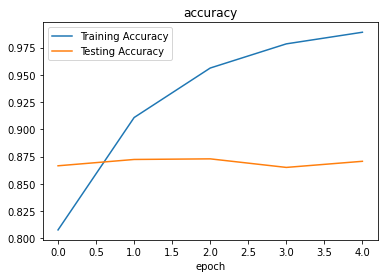

<Figure size 432x288 with 0 Axes>

In [171]:
plot_accuracy(history)

**model3_200d : Bidirectional LSTM Model with 200 Dimensions Glove Embeddings**

In [172]:
# Model Building
tensorflow.compat.v1.reset_default_graph()                                                                                        # Resetting the Graph
model3_200d=Sequential() 
model3_200d.add(Embedding(vocabulary_size, embedding_size_200d, weights = [embedding_matrix_200d], input_length=max(temp)))       # Embedding Layer
model3_200d.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))                                     # Bi-directional LSTM layer
model3_200d.add(TimeDistributed(Dense(100,activation='relu')))                                                                    # Time Distributed Dense Layer
model3_200d.add(Flatten())                                                                                                        # Flatten
model3_200d.add(Dense(100,activation='relu'))                                                                                     # Adding Dense Layer  
model3_200d.add(Dense(1,activation='sigmoid'))                                                                                    # Adding Dense Layer
model3_200d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 200)          5680000   
_________________________________________________________________
bidirectional (Bidirectional (None, 237, 200)          240800    
_________________________________________________________________
time_distributed (TimeDistri (None, 237, 100)          20100     
_________________________________________________________________
flatten (Flatten)            (None, 23700)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2370100   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 8,311,101
Trainable params: 8,311,101
Non-trainable params: 0
______________________________________________

In [0]:
model3_200d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [174]:
history = model3_200d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 296s 1s/step - loss: 0.4176 - accuracy: 0.8033 - val_loss: 0.3324 - val_accuracy: 0.8559
Epoch 2/5
214/214 [==============================] - 293s 1s/step - loss: 0.2424 - accuracy: 0.9016 - val_loss: 0.3003 - val_accuracy: 0.8759
Epoch 3/5
214/214 [==============================] - 295s 1s/step - loss: 0.1481 - accuracy: 0.9450 - val_loss: 0.3526 - val_accuracy: 0.8602
Epoch 4/5
214/214 [==============================] - 293s 1s/step - loss: 0.0824 - accuracy: 0.9715 - val_loss: 0.4003 - val_accuracy: 0.8738
Epoch 5/5
214/214 [==============================] - 294s 1s/step - loss: 0.0441 - accuracy: 0.9849 - val_loss: 0.5483 - val_accuracy: 0.8686


Accuracy Report

In [175]:
loss, accuracy = model3_200d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 86.858857


In [0]:
y_predict = model3_200d.predict_classes(X_test)

In [177]:
# Accuracy Report
from sklearn import metrics
Confusion_Matrix=(metrics.confusion_matrix(y_test,y_predict))
print('Confusion Matrix')
print(Confusion_Matrix)

Confusion Matrix
[[2653  373]
 [ 329 1987]]


In [178]:
from sklearn.metrics import classification_report
print('Classification Report for each class level metrics : ')
print(classification_report(y_test, y_predict))

Classification Report for each class level metrics : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3026
           1       0.84      0.86      0.85      2316

    accuracy                           0.87      5342
   macro avg       0.87      0.87      0.87      5342
weighted avg       0.87      0.87      0.87      5342



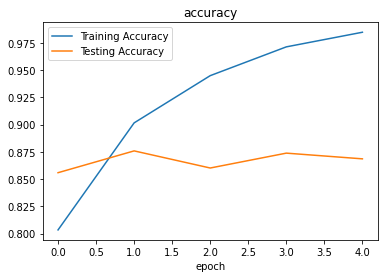

<Figure size 432x288 with 0 Axes>

In [179]:
plot_accuracy(history)

**model3_100d : Bidirectional LSTM Model with 100 Dimensions Glove Embeddings**

In [180]:
# Model Building
tensorflow.compat.v1.reset_default_graph()                                                                                   # Resetting the Graph
model3_100d=Sequential()
model3_100d.add(Embedding(vocabulary_size, embedding_size_100d, weights = [embedding_matrix_100d], input_length=max(temp)))  # Embedding Layer
model3_100d.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))                                # Bi-directional LSTM layer
model3_100d.add(TimeDistributed(Dense(100,activation='relu')))                                                               # Time Distributed Dense Layer
model3_100d.add(Flatten())                                                                                                   # Flatten
model3_100d.add(Dense(100,activation='relu'))                                                                                # Adding Dense Layer
model3_100d.add(Dense(1,activation='sigmoid'))                                                                               # Adding Dense Layer
model3_100d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 100)          2840000   
_________________________________________________________________
bidirectional (Bidirectional (None, 237, 200)          160800    
_________________________________________________________________
time_distributed (TimeDistri (None, 237, 100)          20100     
_________________________________________________________________
flatten (Flatten)            (None, 23700)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2370100   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,391,101
Trainable params: 5,391,101
Non-trainable params: 0
______________________________________________

In [0]:
model3_100d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy

In [182]:
history = model3_100d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 287s 1s/step - loss: 0.4360 - accuracy: 0.7934 - val_loss: 0.3488 - val_accuracy: 0.8474
Epoch 2/5
214/214 [==============================] - 288s 1s/step - loss: 0.2692 - accuracy: 0.8897 - val_loss: 0.3097 - val_accuracy: 0.8705
Epoch 3/5
214/214 [==============================] - 286s 1s/step - loss: 0.1840 - accuracy: 0.9282 - val_loss: 0.2967 - val_accuracy: 0.8765
Epoch 4/5
214/214 [==============================] - 292s 1s/step - loss: 0.1220 - accuracy: 0.9553 - val_loss: 0.3519 - val_accuracy: 0.8712
Epoch 5/5
214/214 [==============================] - 293s 1s/step - loss: 0.0747 - accuracy: 0.9737 - val_loss: 0.4575 - val_accuracy: 0.8757


Accuracy Report

In [183]:
loss, accuracy = model3_100d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 87.570196


In [0]:
y_predict = model3_100d.predict_classes(X_test)

In [185]:
# Accuracy Report
from sklearn import metrics
Confusion_Matrix=(metrics.confusion_matrix(y_test,y_predict))
print('Confusion Matrix')
print(Confusion_Matrix)

Confusion Matrix
[[2678  348]
 [ 316 2000]]


In [186]:
from sklearn.metrics import classification_report
print('Classification Report for each class level metrics : ')
print(classification_report(y_test, y_predict))

Classification Report for each class level metrics : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3026
           1       0.85      0.86      0.86      2316

    accuracy                           0.88      5342
   macro avg       0.87      0.87      0.87      5342
weighted avg       0.88      0.88      0.88      5342



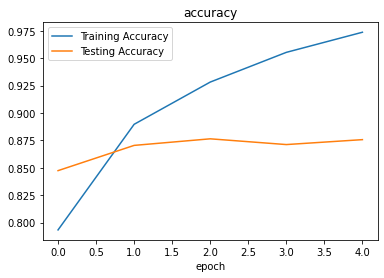

<Figure size 432x288 with 0 Axes>

In [187]:
plot_accuracy(history)

**model3_50d : Bidirectional LSTM Model with 50 Dimensions Glove Embeddings**

In [197]:
# Model Building
tensorflow.compat.v1.reset_default_graph()                                                                                     # Resetting the Graph
model3_50d=Sequential()
model3_50d.add(Embedding(vocabulary_size, embedding_size_50d, weights = [embedding_matrix_50d], input_length=max(temp)))       # Embedding Layer
model3_50d.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))                                   # Bi-directional LSTM layer
model3_50d.add(TimeDistributed(Dense(100,activation='relu')))                                                                  # Time Distributed Dense Layer
model3_50d.add(Flatten())                                                                                                      # Flatten
model3_50d.add(Dense(100,activation='relu'))                                                                                   # Adding Dense Layer
model3_50d.add(Dense(1,activation='sigmoid'))                                                                                  # Adding Dense Layer
model3_50d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 237, 50)           1420000   
_________________________________________________________________
bidirectional (Bidirectional (None, 237, 200)          120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 237, 100)          20100     
_________________________________________________________________
flatten (Flatten)            (None, 23700)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2370100   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 3,931,101
Trainable params: 3,931,101
Non-trainable params: 0
______________________________________________

In [0]:
model3_50d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [199]:
history = model3_50d.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
214/214 [==============================] - 300s 1s/step - loss: 0.4864 - accuracy: 0.7558 - val_loss: 0.3783 - val_accuracy: 0.8325
Epoch 2/5
214/214 [==============================] - 301s 1s/step - loss: 0.3003 - accuracy: 0.8719 - val_loss: 0.3006 - val_accuracy: 0.8740
Epoch 3/5
214/214 [==============================] - 300s 1s/step - loss: 0.2091 - accuracy: 0.9159 - val_loss: 0.3269 - val_accuracy: 0.8677
Epoch 4/5
214/214 [==============================] - 302s 1s/step - loss: 0.1423 - accuracy: 0.9449 - val_loss: 0.3263 - val_accuracy: 0.8755
Epoch 5/5
214/214 [==============================] - 311s 1s/step - loss: 0.1022 - accuracy: 0.9627 - val_loss: 0.3944 - val_accuracy: 0.8677


Accuracy Report

In [200]:
loss, accuracy = model3_50d.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 86.765254


In [0]:
y_predict = model3_100d.predict_classes(X_test)

In [202]:
# Accuracy Report
from sklearn import metrics
Confusion_Matrix=(metrics.confusion_matrix(y_test,y_predict))
print('Confusion Matrix')
print(Confusion_Matrix)

Confusion Matrix
[[2678  348]
 [ 316 2000]]


In [204]:
from sklearn.metrics import classification_report
print('Classification Report for each class level metrics : ')
print(classification_report(y_test, y_predict))

Classification Report for each class level metrics : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3026
           1       0.85      0.86      0.86      2316

    accuracy                           0.88      5342
   macro avg       0.87      0.87      0.87      5342
weighted avg       0.88      0.88      0.88      5342



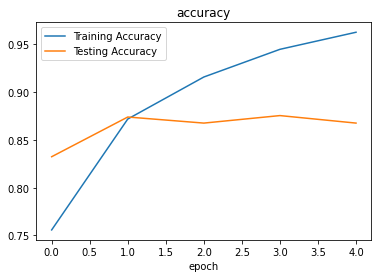

<Figure size 432x288 with 0 Axes>

In [203]:
plot_accuracy(history)

In [0]:
# Comparative Accuracy Report
# ===========================

# ================|===============|=====================|=====================|=====================|====================|
#     Model       |               |300d Glove Embeddings|200d Glove Embeddings|100d Glove Embeddings|50d Glove Embeddings|
# ================|===============|=====================|=====================|=====================|====================|
#                 | Model Name    |    model1_300d      |      model1_200d    |    model1_100d      |    model1_50d      | 
# Fully Connected | Training Acc  |      53.72 %        |        47.61 %      |     50.91 %         |      52.62 %       |
# Neural Network  | Validation Acc|      54.53 %        |        48.26 %      |     51.72 %         |      51.65 %       |
# ----------------|---------------|---------------------|---------------------|---------------------|--------------------|
#                 | Model Name    |    model2_300d      |      model2_200d    |    model2_100d      |    model2_50d      | 
#  Sequential     | Training Acc  |      45.77 %        |        45.16 %      |      56.56 %        |      55.62 %       |
#   LSTM          | Validation Acc|      45.26 %        |        44.46 %      |      56.76 %        |      56.29 %       |
# ----------------|---------------|---------------------|---------------------|---------------------|--------------------|
#                 | Model Name    |    model3_300d      |      model3_200d    |    model3_100d      |    model3_50d      | 
#  Bidirectional  | Training Acc  |      98.91 %        |        98.49 %      |      97.37 %        |      96.27 %       |
#   LSTM          | Validation Acc|      87.06 %        |        86.86 %      |      87.57 %        |      86.77 %       |
# ================|===============|=====================|=====================|=====================|====================|


In [0]:
# ******************************************************************************************************
# Bidirectional LSTM Models performs better than other two models, but the computation time is larger **
# ******************************************************************************************************